In [427]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
import csv
from math import sqrt
from scipy import stats
pd.options.mode.chained_assignment = None

In [428]:
def getErrMC(PE):
    return 163551/(1847.39+pow(PE,2.10082))+8.65312;

In [429]:
def getErr(PE):
    return 165143/(1882.9+pow(PE,2.11447)) + 10.4321;

In [366]:
# Read in the fil
col = [x for x in range(1,34) if x % 2 == 0]
Passed = pd.read_csv('Desktop/Python/Alltracks_hitinfo_demo_new6.txt',usecols=col,delimiter=' ',header=None,skiprows=1,skipfooter=1,engine='python')
Passed.columns=['PECor','MIP','GeV','X','Y','Z','HitTime','View','ID','Plane','Cell','Channel','TDC','TNS','ADC','PE']
Passed.head()

,PECor,MIP,GeV,X,Y,Z,HitTime,View,ID,Plane,Cell,Channel,TDC,TNS,ADC,PE
0,202.95,0.85,0.01,-529.86,-768.19,4373.90,52.50,0,0,655,58,537541690,1376,20584.47,102,36.14
1,193.68,0.81,0.01,-533.02,-755.21,4381.79,-9.41,1,0,656,1,537542657,1364,20508.79,94,34.80
2,143.13,0.60,0.01,-533.01,-751.31,4381.78,49.93,1,0,656,2,537542658,1384,20567.87,72,26.62
3,133.43,0.56,0.01,-533.01,-747.40,4381.77,65.80,1,0,656,3,537542659,1388,20583.50,67,24.02
4,387.89,1.63,0.02,-536.45,-740.45,4387.19,77.28,0,0,657,56,537543736,1396,20606.93,206,75.77


In [375]:
XZView = Passed[['PECor','X','Y','Z','HitTime']][Passed['View'] == 0] 
YZView = Passed[['PECor','X','Y','Z','HitTime']][Passed['View'] == 1] 
XZView.head()

,PECor,X,Y,Z,HitTime
0,202.95,-529.86,-768.19,4373.90,52.50
4,387.89,-536.45,-740.45,4387.19,77.28
7,460.16,-541.59,-711.61,4400.49,17.84
10,258.75,-548.18,-683.33,4413.79,51.44
13,65.68,-553.32,-656.63,4427.08,-7.60


Take the hit that happened at the lowest and highest point in x , and the time of the lowest hit.
    

In [376]:
x0 = XZView['X'].iloc[-1]
x1 = XZView['X'].iloc[0]
y0 = XZView['Y'].iloc[-1]
y1 = XZView['Y'].iloc[0]
z0 = XZView['Z'].iloc[-1]
z1 = XZView['Z'].iloc[0]


dist = sqrt((x0-x1)**2 + (y0-y1)**2 + (z0-z1)**2 )
TOF = dist/29.97
TOFr = TOF /(x1-x0)

Calculate expected and observed time

In [377]:
XZView['Texp']= XZView['X'].apply(lambda x : TOFr*(x - x0))
XZView['Texp_err']=XZView['PECor'].apply(lambda x : getErr(x))
errors =  XZView['Texp_err'].tolist()

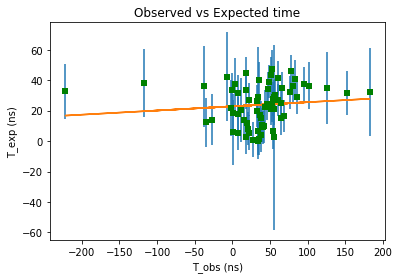

In [378]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
# Calculate a linear least-squares regression for two sets of measurements.
slope, intercept, r_value, p_value, std_err = stats.linregress(XZView['HitTime'],XZView['Texp'])
line = slope*XZView['HitTime']+intercept

plt.xlabel("T_obs (ns)")
plt.ylabel("T_exp (ns)")
plt.title("Observed vs Expected time")

plt.errorbar(XZView['HitTime'], XZView['Texp'], yerr=errors,fmt='o', marker='s',mfc='red',
         mec='green', ms=2, mew=4)
plt.plot(XZView['HitTime'], line, label="fit");
plt.show() 

In [379]:
print ( slope,p_value)

0.027354578794125846 0.37489175360213356


Let's do the same in the y view

In [267]:
x0 = YZView['X'].iloc[-1]
x1 = YZView['X'].iloc[0]
y0 = YZView['Y'].iloc[-1]
y1 = YZView['Y'].iloc[0]
z0 = YZView['Z'].iloc[-1]
z1 = YZView['Z'].iloc[0]


dist = sqrt((x0-x1)**2 + (y0-y1)**2 + (z0-z1)**2 )
TOF = dist/29.97
TOFr = TOF /(x1-x0)

In [380]:
YZView['Texp']     = YZView['X'].apply(lambda x : TOFr*(x - x0))
YZView['Texp_err'] = YZView['PECor'].apply(lambda x : getErr(x))
errors =  YZView['Texp_err'].tolist()

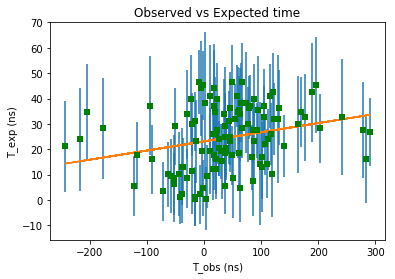

In [381]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
# Calculate a linear least-squares regression for two sets of measurements.
slope, intercept, r_value, p_value, std_err = stats.linregress(YZView['HitTime'],YZView['Texp'])
line = slope*YZView['HitTime']+intercept

plt.xlabel("T_obs (ns)")
plt.ylabel("T_exp (ns)")
plt.title("Observed vs Expected time")

plt.errorbar(YZView['HitTime'], YZView['Texp'], yerr=errors,fmt='o', marker='s',mfc='red',
         mec='green', ms=2, mew=4)
plt.plot(YZView['HitTime'], line, label="fit");
plt.show() 

In [382]:
print(slope, p_value)

0.0360657623287318 0.004354088608773065


Lets do the same thing with cosmic

In [424]:
col = [x for x in range(0,32) if x % 2 == 1]
BKG = pd.read_csv('Desktop/Python/cosmic_info_track_3.txt',usecols=col,delimiter=' ',header=None)
BKG.columns=['PECor','MIP','GeV','X','Y','Z','HitTime','View','ID','Plane','Cell','Channel','TDC','TNS','ADC','PE']
BKG.head()

,PECor,MIP,GeV,X,Y,Z,HitTime,View,ID,Plane,Cell,Channel,TDC,TNS,ADC,PE
0,159.96,0.68,0.01,243.50,745.11,5361.14,-4.69,0,0,803,253,537693437,104,729.98,347,132.04
1,123.41,0.53,0.01,287.44,745.11,5361.14,-2.87,0,0,803,264,537693448,124,726.56,352,129.80
2,118.34,0.50,0.01,267.93,745.11,5361.14,-1.66,0,0,803,259,537693443,120,726.56,296,108.74
3,170.62,0.73,0.01,264.03,745.11,5361.14,2.99,0,0,803,258,537693442,116,730.96,422,158.95
4,113.07,0.48,0.01,260.13,745.11,5361.14,4.22,0,0,803,257,537693441,128,731.93,291,106.46


In [425]:
XZViewBKG = BKG[['PECor','X','Y','Z','HitTime']][BKG['View'] == 0] 
YZViewBKG = BKG[['PECor','X','Y','Z','HitTime']][BKG['View'] == 1] 
XZViewBKG.head()

,PECor,X,Y,Z,HitTime
0,159.96,243.50,745.11,5361.14,-4.69
1,123.41,287.44,745.11,5361.14,-2.87
2,118.34,267.93,745.11,5361.14,-1.66
3,170.62,264.03,745.11,5361.14,2.99
4,113.07,260.13,745.11,5361.14,4.22


In [389]:
x0 = XZViewBKG['X'].iloc[0]
x1 = XZViewBKG['X'].iloc[-1]
y0 = XZViewBKG['Y'].iloc[0]
y1 = XZViewBKG['Y'].iloc[-1]
z0 = XZViewBKG['Z'].iloc[0]
z1 = XZViewBKG['Z'].iloc[-1]


dist = sqrt((x0-x1)**2 + (y0-y1)**2 + (z0-z1)**2 )
TOF = dist/29.97
TOFr = TOF /(x1-x0)

In [390]:
XZViewBKG['Texp']     = XZViewBKG['X'].apply(lambda x : TOFr*(x - x0))
XZViewBKG['Texp_err'] = XZViewBKG['PECor'].apply(lambda x : getErrMC(x))
errors =  XZViewBKG['Texp_err'].tolist()

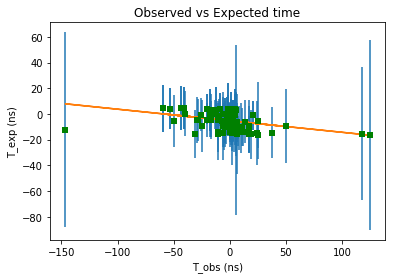

In [391]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
# Calculate a linear least-squares regression for two sets of measurements.
slope, intercept, r_value, p_value, std_err = stats.linregress(XZViewBKG['HitTime'],XZViewBKG['Texp'])
line = slope*XZViewBKG['HitTime']+intercept

plt.xlabel("T_obs (ns)")
plt.ylabel("T_exp (ns)")
plt.title("Observed vs Expected time")

plt.errorbar(XZViewBKG['HitTime'], XZViewBKG['Texp'], yerr=errors,fmt='o', marker='s',mfc='red',
         mec='green', ms=2, mew=4)
plt.plot(XZViewBKG['HitTime'], line, label="fit");
plt.show() 

In [392]:
slope

-0.0899271579637757

In [393]:
p_value

5.9564522602755546e-05

In [417]:
col = [x for x in range(0,32) if x % 2 == 1]
SIG = pd.read_csv('Desktop/Python/wimsim_hit5.txt',usecols=col,delimiter=' ',header=None)
SIG.columns=['PECor','MIP','GeV','X','Y','Z','HitTime','View','ID','Plane','Cell','Channel','TDC','TNS','ADC','PE']
SIG.shape

(87, 16)

In [418]:
XZViewSIG = SIG[['PECor','X','Y','Z','HitTime']][SIG['View'] == 0] 
YZViewSIG = SIG[['PECor','X','Y','Z','HitTime']][SIG['View'] == 1] 
YZViewSIG.shape

(34, 5)

In [419]:
x0 = YZViewSIG['X'].iloc[0]
x1 = YZViewSIG['X'].iloc[-1]
y0 = YZViewSIG['Y'].iloc[0]
y1 = YZViewSIG['Y'].iloc[-1]
z0 = YZViewSIG['Z'].iloc[0]
z1 = YZViewSIG['Z'].iloc[-1]


dist = sqrt((x0-x1)**2 + (y0-y1)**2 + (z0-z1)**2 )
TOF = dist/29.97
TOFr = TOF /(x1-x0)

In [420]:
YZViewSIG['Texp']     = YZViewSIG['X'].apply(lambda x : TOFr*(x - x0))
YZViewSIG['Texp_err'] = YZViewSIG['PECor'].apply(lambda x : getErrMC(x))
errors =  YZViewSIG['Texp_err'].tolist()

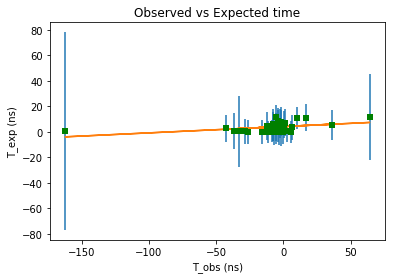

In [421]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
# Calculate a linear least-squares regression for two sets of measurements.
slope, intercept, r_value, p_value, std_err = stats.linregress(YZViewSIG['HitTime'],YZViewSIG['Texp'])
line = slope*YZViewSIG['HitTime']+intercept

plt.xlabel("T_obs (ns)")
plt.ylabel("T_exp (ns)")
plt.title("Observed vs Expected time")

plt.errorbar(YZViewSIG['HitTime'], YZViewSIG['Texp'], yerr=errors,fmt='o', marker='s',mfc='red',
         mec='green', ms=2, mew=4)
plt.plot(YZViewSIG['HitTime'], line, label="fit");
plt.show() 

In [422]:
slope

0.0499152957106836

In [423]:
p_value

0.012787688826438588